Some weights of CustomBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\USER\anaconda3\envs\ryanbert\lib\site-packages\transformers\optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
eval: 100%|██████████| 3/3 [00:13<00:00,  4.45s/it]


epoch 1, loss 0.0224, train acc 0.556, test acc 0.656, time: 253.690
              precision    recall  f1-score   support

           0       0.64      0.96      0.77        54
           1       0.78      0.19      0.31        36

    accuracy                           0.66        90
   macro avg       0.71      0.58      0.54        90
weighted avg       0.70      0.66      0.59        90



eval: 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]


epoch 2, loss 0.0179, train acc 0.751, test acc 0.789, time: 259.212
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        54
           1       0.95      0.50      0.65        36

    accuracy                           0.79        90
   macro avg       0.85      0.74      0.75        90
weighted avg       0.83      0.79      0.77        90



eval: 100%|██████████| 3/3 [00:12<00:00,  4.07s/it]


epoch 3, loss 0.0127, train acc 0.844, test acc 0.733, time: 260.906
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.64      0.75      0.69        36

    accuracy                           0.73        90
   macro avg       0.73      0.74      0.73        90
weighted avg       0.74      0.73      0.74        90



eval: 100%|██████████| 3/3 [00:10<00:00,  3.35s/it]


epoch 4, loss 0.0079, train acc 0.920, test acc 0.867, time: 248.356
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        54
           1       1.00      0.67      0.80        36

    accuracy                           0.87        90
   macro avg       0.91      0.83      0.85        90
weighted avg       0.89      0.87      0.86        90



eval: 100%|██████████| 3/3 [00:13<00:00,  4.47s/it]


epoch 5, loss 0.0048, train acc 0.956, test acc 0.922, time: 255.050
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       1.00      0.81      0.89        36

    accuracy                           0.92        90
   macro avg       0.94      0.90      0.92        90
weighted avg       0.93      0.92      0.92        90



eval: 100%|██████████| 3/3 [00:12<00:00,  4.08s/it]


epoch 6, loss 0.0030, train acc 0.980, test acc 0.922, time: 272.578
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.91      0.89      0.90        36

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



eval: 100%|██████████| 3/3 [00:11<00:00,  3.83s/it]


epoch 7, loss 0.0018, train acc 0.985, test acc 0.911, time: 250.411
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.91      0.86      0.89        36

    accuracy                           0.91        90
   macro avg       0.91      0.90      0.91        90
weighted avg       0.91      0.91      0.91        90



eval: 100%|██████████| 3/3 [00:11<00:00,  3.89s/it]


epoch 8, loss 0.0013, train acc 0.990, test acc 0.911, time: 271.958
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.94      0.83      0.88        36

    accuracy                           0.91        90
   macro avg       0.92      0.90      0.91        90
weighted avg       0.91      0.91      0.91        90



eval: 100%|██████████| 3/3 [00:13<00:00,  4.45s/it]


epoch 9, loss 0.0009, train acc 0.994, test acc 0.933, time: 272.862
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.94      0.89      0.91        36

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



eval: 100%|██████████| 3/3 [00:12<00:00,  4.21s/it]


epoch 10, loss 0.0005, train acc 0.999, test acc 0.933, time: 259.868
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.94      0.89      0.91        36

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



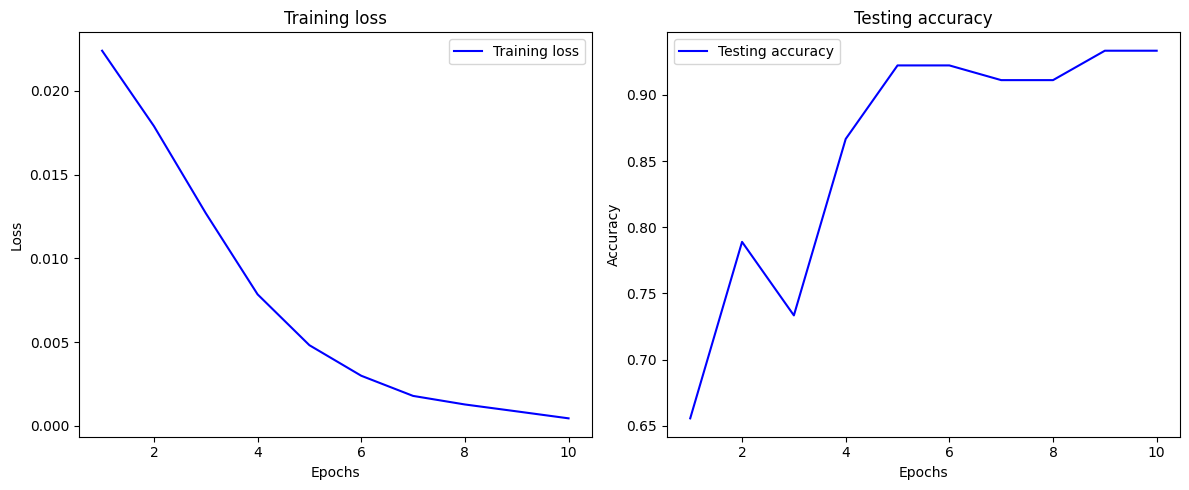

In [8]:
import time
import math
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score
from concurrent.futures import ThreadPoolExecutor
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertPreTrainedModel, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from torch.nn import Dropout, Linear, CrossEntropyLoss

class CustomBertForSequenceClassification(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.bert = BertModel(config)
        self.dropout = Dropout(0.7)
        self.classifier = Linear(config.hidden_size, config.num_labels)

        self.init_weights()

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, labels=None):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )

        pooled_output = outputs[1]

        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)

        outputs = (logits,) + outputs[2:]

        if labels is not None:
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            outputs = (loss,) + outputs

        return outputs

class DataProcessForSingleSentence(object):
    def __init__(self, bert_tokenizer, max_workers=10):
        self.bert_tokenizer = bert_tokenizer
        self.pool = ThreadPoolExecutor(max_workers=max_workers)

    def get_input(self, dataset, max_seq_len=30):
        sentences = dataset.iloc[:, 0].tolist()
        labels = dataset.iloc[:, 1].tolist()
        labels = LabelEncoder().fit_transform(labels)
        token_seq = list(self.pool.map(self.bert_tokenizer.tokenize, sentences))
        result = list(self.pool.map(self.trunate_and_pad, token_seq, [max_seq_len] * len(token_seq)))
        seqs = [i[0] for i in result]
        seq_masks = [i[1] for i in result]
        seq_segments = [i[2] for i in result]

        t_seqs = torch.tensor(seqs, dtype=torch.long)
        t_seq_masks = torch.tensor(seq_masks, dtype=torch.long)
        t_seq_segments = torch.tensor(seq_segments, dtype=torch.long)
        t_labels = torch.tensor(labels, dtype=torch.long)

        return TensorDataset(t_seqs, t_seq_masks, t_seq_segments, t_labels)

    def trunate_and_pad(self, seq, max_seq_len):
        if len(seq) > (max_seq_len - 2):
            seq = seq[0: (max_seq_len - 2)]
        seq = ['[CLS]'] + seq + ['[SEP]']
        seq = self.bert_tokenizer.convert_tokens_to_ids(seq)
        padding = [0] * (max_seq_len - len(seq))
        seq_mask = [1] * len(seq) + padding
        seq_segment = [0] * len(seq) + padding
        seq += padding
        assert len(seq) == max_seq_len
        assert len(seq_mask) == max_seq_len
        assert len(seq_segment) == max_seq_len
        return seq, seq_mask, seq_segment

def load_data(train_filepath, test_filepath, pretrained_model_name_or_path, max_seq_len, batch_size):
    raw_train_data = pd.read_excel(train_filepath, sheet_name='train')
    raw_test_data = pd.read_excel(test_filepath, sheet_name='test')
    bert_tokenizer = BertTokenizer.from_pretrained(pretrained_model_name_or_path, do_lower_case=True)
    processor = DataProcessForSingleSentence(bert_tokenizer=bert_tokenizer)
    train_data = processor.get_input(raw_train_data, max_seq_len)
    test_data = processor.get_input(raw_test_data, max_seq_len)

    train_iter = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    test_iter = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
    total_train_batch = math.ceil(len(raw_train_data) / batch_size)
    total_test_batch = math.ceil(len(raw_test_data) / batch_size)
    return train_iter, test_iter, total_train_batch, total_test_batch

def evaluate_accuracy(data_iter, net, device, batch_count):
    prediction_labels, true_labels = [], []
    with torch.no_grad():
        for batch_data in tqdm(data_iter, desc='eval', total=batch_count):
            batch_data = tuple(t.to(device) for t in batch_data)
            labels = batch_data[-1]
            outputs = net(*batch_data[:-1])
            logits = outputs[0]
            predictions = logits.softmax(dim=1).argmax(dim=1)
            prediction_labels.append(predictions.detach().cpu().numpy())
            true_labels.append(labels.detach().cpu().numpy())
    return classification_report(np.concatenate(true_labels), np.concatenate(prediction_labels), zero_division=0), accuracy_score(np.concatenate(true_labels), np.concatenate(prediction_labels))

def main():
    file_path = './data.xlsx'
    data = pd.read_excel(file_path)
    train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
    
    train_data_path = './train_data.xlsx'
    test_data_path = './test_data.xlsx'
    
    with pd.ExcelWriter(train_data_path) as writer:
        train_data.to_excel(writer, sheet_name='train', index=False)
    with pd.ExcelWriter(test_data_path) as writer:
        test_data.to_excel(writer, sheet_name='test', index=False)

    batch_size, max_seq_len = 32, 200
    pretrained_model_name_or_path = 'bert-base-uncased'
    train_iter, test_iter, train_batch_count, test_batch_count = load_data(train_data_path, test_data_path, pretrained_model_name_or_path, max_seq_len, batch_size)
    
    model = CustomBertForSequenceClassification.from_pretrained(pretrained_model_name_or_path, num_labels=2)
    tokenizer = BertTokenizer.from_pretrained(pretrained_model_name_or_path)
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    loss_func = nn.CrossEntropyLoss()

    train_losses = []
    test_accuracies = []

    total_steps = len(train_iter) * 50
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    for epoch in range(10):
        start = time.time()
        model.train()
        train_loss_sum, train_acc_sum, n = 0.0, 0.0, 0
        for step, batch_data in tqdm(enumerate(train_iter), desc='train epoch:{}/{}'.format(epoch + 1, 25), total=train_batch_count):
            batch_data = tuple(t.to(device) for t in batch_data)
            batch_seqs, batch_seq_masks, batch_seq_segments, batch_labels = batch_data
            outputs = model(batch_seqs, batch_seq_masks, batch_seq_segments)
            logits = outputs[0]
            loss = loss_func(logits, batch_labels)
            loss.backward()
            train_loss_sum += loss.item()
            logits = logits.softmax(dim=1)
            train_acc_sum += (logits.argmax(dim=1) == batch_labels).sum().item()
            n += batch_labels.shape[0]
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
        train_losses.append(train_loss_sum / n)
        model.eval()
        classification_report, test_accuracy = evaluate_accuracy(test_iter, model, device, test_batch_count)
        test_accuracies.append(test_accuracy)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time: %.3f' %
              (epoch + 1, train_loss_sum / n, train_acc_sum / n, test_accuracy, (time.time() - start)))
        print(classification_report)

    new_model_save_path = './fine_tuned_english_bert'
    os.makedirs(new_model_save_path, exist_ok=True)
    model.save_pretrained(new_model_save_path)
    tokenizer.save_pretrained(new_model_save_path)

    epochs = range(1, 11)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, 'b', label='Testing accuracy')
    plt.title('Testing accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
if __name__ == '__main__':
    main()
